<a href="https://colab.research.google.com/github/bsguarda/data_science/blob/main/Analisando_os_Dados_do_Airbnb_em_Porto_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Science na Prática
by   Bruno Guarda

---

# Análise dos Dados do Airbnb - Porto em Portugual

O [Airbnb](https://www.airbnb.com.br/) permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação.

O Airbnb nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, a plataforma conta com 4 milhões de anfitriões que já receberam mais de 1 bilhão de hóspedes em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e atividades únicas, que possibilitam aos viajantes vivenciar o mundo de uma forma mais autêntica e conectada.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, usaremos como referência a cidade de Porto em Portugal, iremos analisar os dados e ver quais insights podem ser extraídos a partir de dados brutos.**

##Uma visão geral da cidade do Porto


Porto é uma cidade costeira no noroeste de Portugal sendo a segunda maior cidade do país conhecida pelas pontes imponentes e pela produção de vinho do Porto. No distrito medieval de Ribeira, às margens do rio, ruas estreitas de paralelepípedos passam pelas casas e pelos restaurantes dos comerciantes. A Igreja de São Francisco é conhecida pelo interior barroco exuberante com esculturas douradas ornamentadas. O suntuoso Palácio da Bolsa, do século XIX, era um mercado de ações e foi construído para impressionar investidores europeus em potencial.


<img alt="Colaboratory logo" width="75%" src="https://i0.wp.com/www.eurodicas.com.br/wp-content/uploads/2019/10/melhores-bairros-do-porto.jpg?fit=750%2C500&ssl=1">


##Importando as bibliotecas necessárias para fazer a análise dos dados.
Pandas

Matplotlib

Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtenção dos Dados
Todos os dados desse dataset estão disponíveis no portal da [Inside Airbnb](http://insideairbnb.com/get-the-date.html).

Será usado o seguinte arquivo:  listings.csv


In [ ]:
# importando o dataset listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/portugal/norte/porto/2022-03-14/visualisations/listings.csv')


## Análise dos Dados
O intuito dessa fase do projeto é mostrar no que consiste esse dataset com o propósito de elencar seu entendimento.

**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo de bairros a qual o bairro está inserido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos ultimos 12 meses
*	`license` - identificação da licença 


Antes de fazermos a análise exploratória dos dados temos que entender o problema e traçar o caminho ser seguido para que possamos trazer conclusões acerca do negócio.

Iremos trabalha com os seguintes questionamentos:

* *`Q1. Quantos Atributos (Variáveis) e quantas entradas o nosso conjunto de dados possui? Quais tipos de variáveis?`*
* *`Q2. Qual a porcentagem de valores ausentes no dataset?`*
* *`Q3. Qual o tipo de distribuição das variáveis?`*
* *`Q4. Há outliers presentes?`*
* *`Q5. Qual a correlação existente entre as variáveis`*
* *`Q6. Qual a média dos preços de aluguel em Porto?`*
* *`Q7. Qual o tipo de imóvel mais alugado no Airbnb em Porto?`*
* *`Q8. Qual a localidade mais cara da cidade do Porto?`*
* *`Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?`*


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Iremos identificar a quantidade de entradas e quantos e quais tipos de colunas que nosso dataset possui.

In [ ]:
# Identificando o volume de dados do DataFrame
print(f'Entradas:  {df.shape[0]}')
print(f'Variaveis: {df.shape[1]}')

# verificando as 5 primeiras entradas do dataset
df.head()

Entradas:  10903
Variaveis: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35979,"Over the beach apartment, near Porto",154415,Manuela,VILA DO CONDE,Vila Chã,41.29009,-8.73373,Entire home/apt,80,5,83,2020-09-25,0.59,2,316,0,"Turismo de Portugal, I.P. number 12997/AL"
1,41339,Porto city flat near the sea,6787366,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,2,17,2018-09-28,0.16,22,260,0,29049/AL
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.17,3,0,0,7563/AL
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
4,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,21,2,157,2022-02-22,1.18,7,123,21,6995/AL


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Sabemos que se houver valores ausentes no nosso dataset pode acarretar em uma análise inconsistente e sem está bem fundamentada. Então iremos analisar a quantidade desses dados faltantes para mantermos a qualidade do dataset.

Vamos somar a quantidade de dados faltantes e dividir pela quantidade total para trazermos a porcentagem de cada variável e iremos ordenar em ordem decrescente.


* Assim é possível verificar que `reviews_per_month`e `last_review` tem quase 15% dos valores faltantes.
* E `license` com quase 8% dos valores faltantes.
* E `host_name` com menos de 1% de valores faltantes.

In [ ]:
# Ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) 


reviews_per_month                 0.154820
last_review                       0.154820
license                           0.078786
host_name                         0.000092
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos plotar um histograma para fazer a identificação da distribuição por variáveis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fcf1a4790>,
      dtype=object)

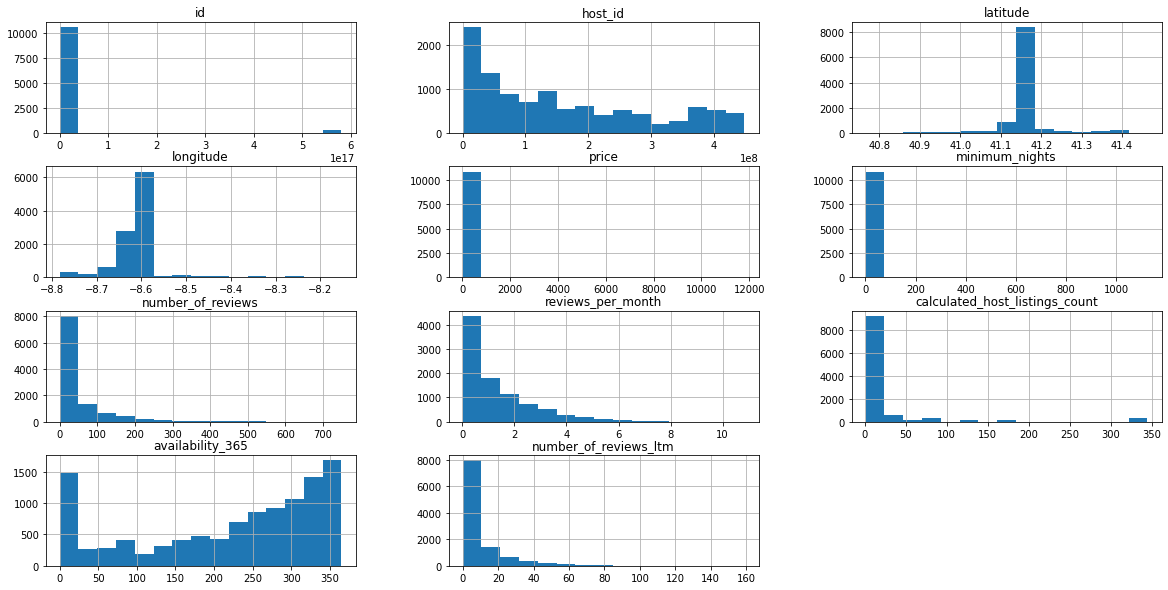

In [ ]:
# Plotando histograma das variáveis numéricas

df.hist(bins=15, figsize=(20,10))

###**Q4. Há outliers presentes?**

Podemos notar que pela distribuição do histograma há indícios da presença de outliers. Notamos que não uma perfeita distribuição em nas variáveis price, minimum_nights e calculated_host_listings_count.

Os valores distorcem toda a representação gráfica e não seguem uma distribuição. Iremos confirmar com o auxílio de duas maneiras rápidas que auxiliam na detecção de outliers. São elas:


* O método `discribe()` que faz um resumo estatístico;
* Plotar um `boxplots` para a variável.

In [ ]:
#Verificando o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10903.000000,10903.000000,10903.000000,9215.000000,10903.00000,10903.000000
mean,89.855911,4.022287,44.483261,1.298514,23.97918,219.769054
std,312.283497,30.912796,73.829714,1.377262,64.28213,121.591401
min,9.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,42.000000,1.000000,2.000000,0.270000,1.00000,132.000000
50%,60.000000,2.000000,14.000000,0.810000,4.00000,257.000000
75%,87.000000,2.000000,53.000000,1.920000,11.00000,323.000000
max,11799.000000,1124.000000,749.000000,10.840000,345.00000,365.000000


Analisando o resume estatístico acima, podemos inferir algumas hipóteses, vejamos:

* Na variável `price` temos que 75% dos valores estão abaixo de 87, no entanto o seu valor máximo é de 11799.
* Na variável `minimum_nights` temos que o máximo é de 1124 dias, mostrando que está acima de 365 dias no ano.

Iremos plotar o Boxsplot para minimum_nights


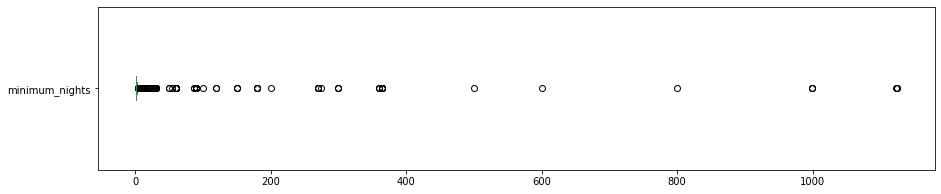

minimum_nights: valores acima de 30: 
72 entradas
0.6604% 


In [ ]:
#Boxsplot minimim_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Buscando a quantidade de valores acima de 30 dias para minimum_nights

print(f'minimum_nights: valores acima de 30: ')
print(f'{(len(df[df.minimum_nights > 30]))} entradas')
print(f'{(len(df[df.minimum_nights > 30]) / df.shape[0]) * 100 :.4f}% ')



Iremos plotar o Boxsplot para Price

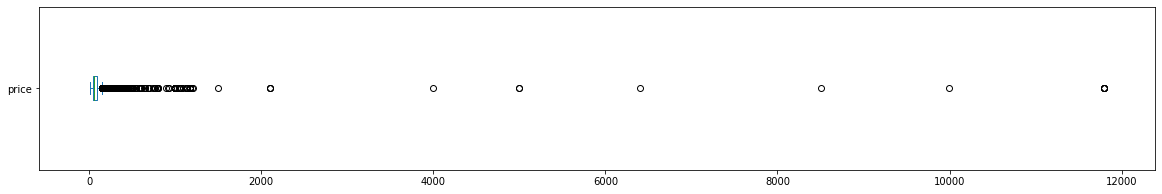

Price: Valores acima de 1000
40 entradas
0.3669%


In [ ]:
# Boxsplot Price

df.price.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Buscando valor acima de 1000 para price
print(f'Price: Valores acima de 1000')
print(f'{(len(df[df.price > 1000]))} entradas')
print(f'{(len(df[df.price > 1000]) / df.shape[0]) * 100 :.4f}%')

Agora iremos plotar os Histogramas sem outliers

Foi identificado os outliers nas variáveis `price` e `minimum_nights`, iremos limpar o Dataframe e plotar um novo histograma com outro DataFrame.

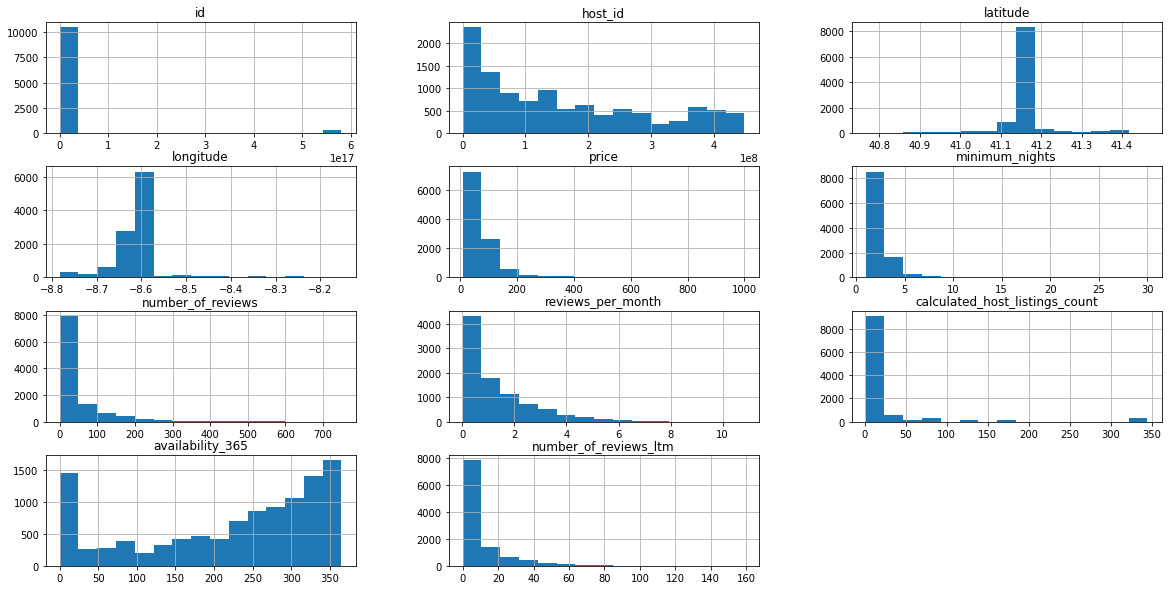

In [ ]:
# Removendo os outliers em um novo DataFrame
df2 = df.copy()
df2.drop(df2[df2.price > 1000].index, axis=0, inplace=True)
df2.drop(df2[df2.minimum_nights > 30].index, axis=0, inplace=True)

# Plotando histograma para as variáveis numéricas 
df2.hist(bins=15, figsize=(20, 10));

##**Q5. Qual a correlação existente entre as variáveis?**

O conceito de correlação representa a existência de uma relação entre duas coisas. Na nossa análise, estamos buscando esse significado de relação ou semelhança entre duas variáveis.

O coeficiente de correlação tem a função de estabelecer a intensidade entre a relação entre as variáveis. Então iremos identificar essa correlação entre as variáveis com os seguintes procedimentos:

* Criaremos uma matriz de correlação
* Um *heatmap* será gerado a partir dessa matriz criada, utilizando a biblioteca `seaborn`


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024028,-0.098722,-0.134512,-0.070403,0.082074
minimum_nights,-0.024028,1.000000,-0.052864,-0.119876,-0.077685,-0.103042
number_of_reviews,-0.098722,-0.052864,1.000000,0.683073,0.053016,-0.028451
reviews_per_month,-0.134512,-0.119876,0.683073,1.000000,0.177957,0.071937
calculated_host_listings_count,-0.070403,-0.077685,0.053016,0.177957,1.000000,0.134825
availability_365,0.082074,-0.103042,-0.028451,0.071937,0.134825,1.000000


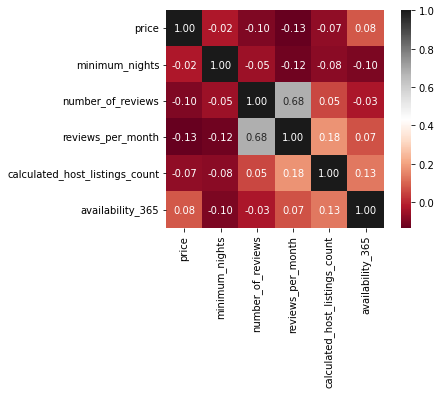

In [ ]:
# Criando e mostrando a matriz de correlação

corr = df2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

# Plotando o heatmap com as correlações

sns.heatmap(corr, cmap='RdGy', fmt='.2f', square=True, linecolor='yellow', annot=True);


### **Q6. Qual a média dos preços de aluguel em Porto?**

Verificamos que a média de preços encontrados foi de 77.92

In [ ]:
# Calculando a média da coluna price

df2.price.mean()


77.92309117865085

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb em Porto?**

Na coluna com a variável room_type nos mostra o tipo de locação que está anunciada, ou seja, existe opções de apartamentos/casas inteiras, aluguel de um quarto apenas ou dividir o quarto com outras pessoas.

Vamos fazer a contagem da quantidade de ocorrências de cada tipo especificado de aluguel, usando o método `value_counts()`




In [ ]:
# Quantificando cada tipo de imóvel disponível

df2.room_type.value_counts()

Entire home/apt    8613
Private room       1943
Hotel room          145
Shared room          91
Name: room_type, dtype: int64

In [ ]:
# Mostrando a porcentagem de cada tipo de imóvel disponível

df2.room_type.value_counts() / df2.shape[0] * 100

Entire home/apt    79.809118
Private room       18.004077
Hotel room          1.343588
Shared room         0.843217
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara da cidade do Porto?**
Iremos usar o método `groupby()` que consiste em verificar uma variável em função de outra. Iremos aplicar esse método para comparar os bairros (neighbourhoods) com relação ao preço de locação.


In [84]:
# Estratificando os preços por bairros, na média

df2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)                          600.000000
Paços de Brandão                             400.000000
Cristelo                                     300.000000
Recarei                                      250.000000
São Miguel do Mato                           229.666667
Touguinha e Touguinhó                        226.333333
Melres e Medas                               218.066667
Bagunte, Ferreiró, Outeiro Maior e Parada    212.000000
Alvarenga                                    205.916667
Louredo                                      205.714286
Name: price, dtype: float64

Conseguimos verificar que os 4 primeiros bairros que são: `Negrelos (São Tomé)`, `Paços`, `Cristelo` e `Recarei  de Brandão`, tem a disponibilidade de apenas um imóvel para cada bairro e eles tem o preço bem maior do que a média.

In [91]:
print(df2[df2.neighbourhood == "Negrelos (São Tomé)"].shape)
print(df2[df2.neighbourhood == "Paços de Brandão"].shape)
print(df2[df2.neighbourhood == "Cristelo"].shape)
print(df2[df2.neighbourhood == "Recarei"].shape)
print(df2[df2.neighbourhood == "São Miguel do Mato"].shape)

(1, 18)
(1, 18)
(1, 18)
(1, 18)
(3, 18)


Dentro do dataset do Airbnb são disponibilizados as Latitudes e Longitudes para os imóveis, e utilizando o gráfico de dispersão podemos plotar cada ponto, e iremos atribuir `x=longitude`  e `y=latitude`.

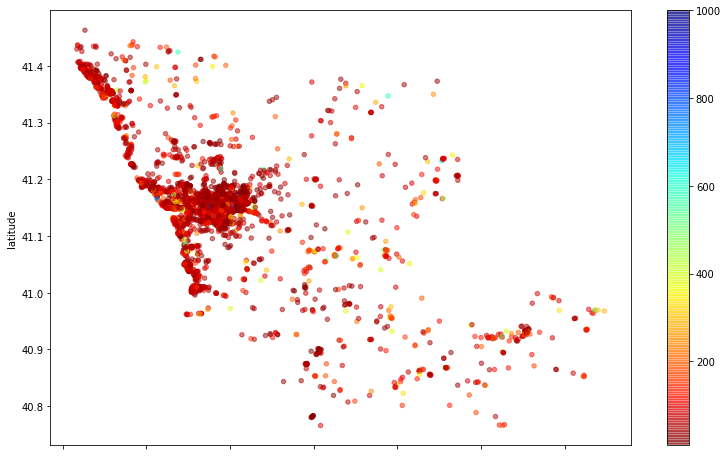

In [127]:
# Plotando os imóveis pela latitude-longitude
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df2['price'], s=20, cmap=plt.get_cmap('jet_r'), figsize=(13,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Foi observado que para os alugueis no Porto a média do número de noites que o hospede precisa alugar é de 2 noites.

In [119]:
# Calculando a média da coluna minimum_nights

df2.minimum_nights.mean()

2.3549851742031134

## Conclusões


Verificamos que em algumas variáveis existem outliers, o que acabou demandando uma limpeza nesses dados para ser feita a análise exploratória. Foi feita uma análise superficial nessa base de dados do Airbnb.

Foi notado também que os 4 primeiros bairros só tinham disponíveis um único imóvel para aluguel e valor cobrado por eles eram bem maior do que média da cidade o que levou a distorção em alguns tributos e informações estatísticas.

Concluindo, é de grande importância lembrar que esse dataset é uma versão resumida, ideal para uma explanação inicial. Em uma próxima analise exploratória, é recomendado que seja usado o conjunto completo de dados com mais de 100 atributos disponíveis.

